In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
sub = pd.read_csv('/Users/yankeyu/Desktop/subscribers.csv')
sub

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [45]:
print(sub['subid'].value_counts())
print(sub['subid'].is_unique)

24643583    1
29903967    1
22623344    1
28429423    1
21559392    1
           ..
27889822    1
20033690    1
24225945    1
29991064    1
21504004    1
Name: subid, Length: 227628, dtype: int64
True


In [46]:
sub.isnull().sum()

Unnamed: 0                           0
subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         34904
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF           

# Missing Values

In [47]:
sub.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,227628.000000,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,341129.200041,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145,13.989544,0.790122
std,197094.201084,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971,0.382453,0.777713
min,1.000000,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,170766.250000,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,340985.500000,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511844.000000,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100,14.000000,1.000000
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [48]:
#preprocessing age colum
sub['age'] = pd.to_numeric(sub['age'], errors = 'coerce')
#clu['age'] = clu['age'].astype(int)
sub['age'] = sub['age'].mask(sub['age'] > 100)
#clu['age'] = pd.to_float(clu['age'], errors = 'coerce')

In [49]:
sub['weekly_consumption_hour'] = pd.to_numeric(sub['weekly_consumption_hour'], errors = 'coerce')
sub['weekly_consumption_hour'] = sub['weekly_consumption_hour'].mask(sub['weekly_consumption_hour'] < 0)

In [50]:
#Drop Na values
sub = sub[sub['intended_use'].notna()]
sub = sub[sub['male_TF'].notna()]
sub = sub[sub['attribution_survey'].notna()]

In [51]:
#Replace Na values as mean, median, mode
sub['num_weekly_services_utilized'].fillna((sub['num_weekly_services_utilized'].mean()),inplace=True)
sub['weekly_consumption_hour'].fillna((sub['weekly_consumption_hour'].mean()),inplace=True)
sub['num_ideal_streaming_services'].fillna((sub['num_ideal_streaming_services'].mean()),inplace=True)
sub['age'].fillna((sub['age'].mean()),inplace=True)
sub['join_fee'].fillna((sub['join_fee'].mean()),inplace=True)

In [52]:
#Replace categorical colums
sub['payment_type'].fillna('NA', inplace = True)
sub['package_type'].fillna('NA', inplace = True)
sub['preferred_genre'].fillna('NA', inplace = True)
sub['op_sys'].fillna('NA', inplace = True)

In [53]:
sub['last_payment'].fillna(0, inplace = True)
sub['next_payment'].fillna(0, inplace = True)
sub['cancel_date'].fillna(0, inplace = True)

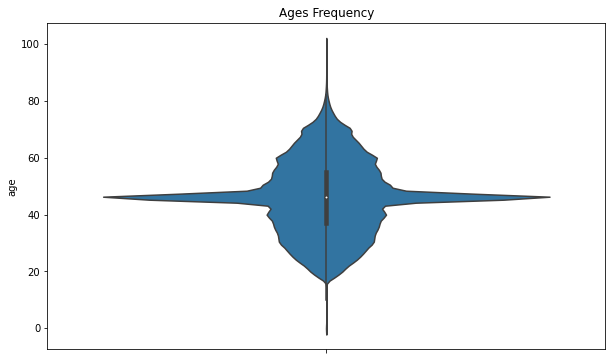

In [54]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=sub["age"])
plt.show()

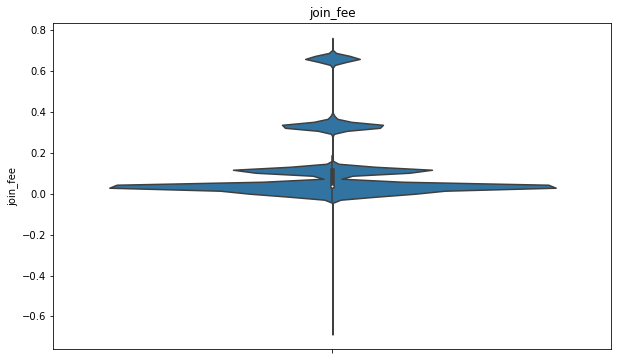

In [84]:
plt.figure(figsize=(10,6))
plt.title("join_fee")
sns.axes_style("dark")
sns.violinplot(y=sub["join_fee"])
plt.show()

In [55]:
sub.isnull().sum()

Unnamed: 0                      0
subid                           0
package_type                    0
num_weekly_services_utilized    0
preferred_genre                 0
intended_use                    0
weekly_consumption_hour         0
num_ideal_streaming_services    0
age                             0
male_TF                         0
country                         0
attribution_technical           0
attribution_survey              0
op_sys                          0
months_per_bill_period          0
plan_type                       0
monthly_price                   0
discount_price                  0
account_creation_date           0
trial_end_date                  0
initial_credit_card_declined    0
join_fee                        0
language                        0
payment_type                    0
num_trial_days                  0
current_sub_TF                  0
payment_period                  0
last_payment                    0
next_payment                    0
cancel_date   

# USER_BASE

# Time Manipulation

In [14]:
'''
import datetime
from datetime import date

#convert string to date 
sub['account_creation_date'] = pd.to_datetime(sub['account_creation_date'])
sub['trial_end_date'] = pd.to_datetime(sub['trial_end_date'])
sub['last_payment'] = pd.to_datetime(sub['last_payment'])
sub['next_payment'] = pd.to_datetime(sub['next_payment'])
sub['cancel_date'] = pd.to_datetime(sub['cancel_date'])

today = date.today().strftime('%Y-%m-%d')
today = pd.to_datetime(today)
"""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-14-844d7e635901>, line 14)

In [15]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223293 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    223293 non-null  int64  
 1   subid                         223293 non-null  int64  
 2   package_type                  223293 non-null  object 
 3   num_weekly_services_utilized  223293 non-null  float64
 4   preferred_genre               223293 non-null  object 
 5   intended_use                  223293 non-null  object 
 6   weekly_consumption_hour       223293 non-null  float64
 7   num_ideal_streaming_services  223293 non-null  float64
 8   age                           223293 non-null  float64
 9   male_TF                       223293 non-null  object 
 10  country                       223293 non-null  object 
 11  attribution_technical         223293 non-null  object 
 12  attribution_survey            223293 non-nul

In [56]:
#Adding account_length column into the dataframe

#account_length = []


sub_period_0 = sub[sub['payment_period'] == 0]

sub1 = sub[sub['trial_completed']==False] #Inactive Cancel in Period 0
sub1 = sub1[sub1['current_sub_TF']==False]
#sub1['account_length'] = sub1['cancel_date'] - sub1['account_creation_date']

sub2 = sub[sub['trial_completed']==False] #Active Cancel in Period0
sub2 = sub2[sub2['current_sub_TF']==True]
#sub2['account_length'] = 14
#sub2['account_length'] = pd.to_timedelta(sub2['account_length'],unit='D')

sub3 = sub_period_0[sub_period_0['trial_completed']==True] #Not yet decision in Period 0
sub3 = sub3[sub3['current_sub_TF']==True]
#sub3['account_length'] = sub3['next_payment'] - sub3['account_creation_date']

sub4 = sub_period_0[sub_period_0['trial_completed']==True] #Not renewed after Period 0
sub4 = sub4[sub4['current_sub_TF']==False]
#sub4['account_length'] = 14
#sub4['account_length'] = pd.to_timedelta(sub4['account_length'],unit='D')

sub_0 = pd.concat([sub1,sub2,sub3, sub4])
sub_0

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
9,681969,23452753,economy,3.000000,drama,replace OTT,28.751405,2.000000,71.000000,False,...,0.330300,ar,NA,14,False,0,0,0,2020-01-27 00:00:00,False
14,546210,26308559,NA,3.009237,NA,expand international access,30.201361,2.061355,48.000000,False,...,0.036700,ar,NA,14,False,0,0,0,2019-07-16 00:00:00,False
22,386250,28863903,base,2.000000,drama,replace OTT,21.501623,2.000000,50.000000,False,...,0.330300,ar,NA,14,False,0,0,0,2020-03-12 00:00:00,False
23,7506,29576692,NA,3.000000,NA,expand international access,34.551230,2.000000,31.000000,False,...,0.036700,ar,Standard Charter,14,False,0,0,0,2019-07-21 00:00:00,False
28,179332,21447938,base,3.000000,drama,replace OTT,30.201361,2.000000,59.000000,False,...,0.330300,ar,RAKBANK,14,False,0,0,0,2019-12-31 00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227609,39499,22532282,base,3.009237,comedy,replace OTT,28.003670,2.061355,46.135975,False,...,0.114231,ar,Paypal,14,False,0,0,0,0,True
227610,110393,26263998,NA,3.009237,NA,expand international access,28.003670,2.061355,43.000000,False,...,0.036700,ar,Paypal,14,False,0,0,0,0,True
227613,553731,20172551,base,3.000000,comedy,replace OTT,21.501623,2.000000,45.000000,False,...,0.036700,ar,NA,14,False,0,0,0,0,True
227614,324200,24317364,enhanced,2.000000,comedy,replace OTT,30.201361,2.000000,52.000000,False,...,0.036700,ar,NA,14,False,0,0,0,0,True


In [57]:
#Period 1 Sub Dataframe


sub_period_1 = sub[sub['payment_period'] == 1]

#Active Users in period 1
sub5 = sub_period_1[sub_period_1['cancel_date'] == 0]
sub5 = sub5[sub5['current_sub_TF']== True]

#Not Renewed Users in period 1
sub6 = sub_period_1[sub_period_1['cancel_date'] == 0]
sub6 = sub6[sub6['current_sub_TF']== False]
#sub5['account_length'] = sub6['cancel_date'] - sub6['account_creation_date']

#Inactive Cancel in period 1
sub7 = sub_period_1[sub_period_1['cancel_date'] != 0]

sub_1= pd.concat([sub5, sub6, sub7])
sub_1


,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,3.009237,comedy,access to exclusive content,28.003670,2.061355,46.135975,False,...,0.114231,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,0,True
1,380374,23383224,base,3.009237,comedy,access to exclusive content,22.951579,2.061355,70.000000,False,...,0.330300,ar,NA,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,0,True
5,284782,24810928,base,3.009237,comedy,access to exclusive content,20.051667,2.061355,70.000000,False,...,0.330300,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,0,True
6,192823,29726122,base,2.000000,comedy,access to exclusive content,20.051667,2.000000,61.000000,False,...,0.330300,ar,Standard Charter,14,True,1,2020-03-04 18:30:15,2020-07-04 18:30:15,0,True
7,315863,20299962,base,3.000000,drama,access to exclusive content,34.551230,2.000000,23.000000,False,...,0.000000,ar,RAKBANK,14,True,1,2020-03-19 14:52:22,2020-07-19 14:52:22,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227450,526010,23280931,base,3.000000,comedy,supplement OTT,30.201361,2.000000,48.000000,False,...,0.036700,ar,NA,14,False,1,2019-10-20 03:22:13,0,2020-02-14 00:00:00,True
227472,502071,20091322,base,2.000000,comedy,supplement OTT,18.601711,2.000000,40.000000,False,...,0.036700,ar,NA,14,False,1,2019-08-25 22:45:11,0,2019-09-03 00:00:00,True
227521,390065,26287727,enhanced,3.000000,drama,replace OTT,22.951579,2.000000,32.000000,False,...,0.036700,ar,NA,14,False,1,2019-11-03 01:53:29,0,2020-01-12 00:00:00,True
227549,639664,29515238,base,3.009237,regional,access to exclusive content,27.301448,2.061355,37.000000,False,...,0.036700,ar,NA,14,False,1,2019-10-17 22:08:53,0,2019-10-17 00:00:00,False


In [58]:
#Period 2 Sub Dataframe
sub_period_2 = sub[sub['payment_period'] == 2]

sub8 = sub_period_2[sub_period_2['cancel_date'] == 0]
sub8 = sub8[sub8['current_sub_TF']== True]

sub9 = sub_period_2[sub_period_2['cancel_date'] == 0]
sub9 = sub9[sub9['current_sub_TF']== False]

sub10 = sub_period_2[sub_period_2['cancel_date'] != 0]

sub_2 = pd.concat([sub8, sub9, sub10])
sub_2



,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
4,681701,26723159,base,4.000000,comedy,replace OTT,22.951579,3.000000,28.0,False,...,0.0367,ar,NA,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,0,True
16,626743,27648682,enhanced,3.009237,comedy,replace OTT,27.301448,2.061355,26.0,False,...,0.0367,ar,NA,14,True,2,2020-02-16 00:15:01,2020-06-16 00:15:01,0,True
20,208223,21511732,enhanced,2.000000,comedy,replace OTT,27.301448,2.000000,26.0,False,...,0.0367,ar,RAKBANK,14,True,2,2020-03-25 03:19:28,2020-07-25 03:19:28,0,True
31,420126,29615706,enhanced,3.000000,regional,access to exclusive content,25.851492,2.000000,61.0,False,...,0.0367,ar,NA,14,True,2,2020-03-23 03:00:12,2020-07-23 03:00:12,0,True
36,546336,27436215,base,3.000000,drama,access to exclusive content,27.301448,2.000000,53.0,False,...,0.0367,ar,NA,14,True,2,2020-02-22 12:14:30,2020-06-22 12:14:30,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225687,111168,28579151,NA,3.000000,NA,expand international access,31.651317,2.000000,33.0,False,...,0.0000,ar,Standard Charter,14,False,2,2019-11-14 18:40:30,0,2019-11-17 00:00:00,True
226101,101192,26320993,NA,3.000000,NA,expand regional access,33.101274,2.000000,57.0,False,...,0.0000,ar,RAKBANK,14,False,2,2019-11-20 21:28:43,0,2020-03-04 00:00:00,True
226102,442786,25390505,NA,3.000000,NA,other,30.201361,2.000000,50.0,False,...,0.0367,ar,NA,14,False,2,2019-11-25 01:53:36,0,2020-01-08 00:00:00,True
226929,660069,26489474,NA,3.009237,NA,expand regional access,22.951579,2.061355,78.0,False,...,0.0367,ar,NA,14,False,2,2019-11-16 05:29:04,0,2019-12-04 00:00:00,True


In [59]:
#Period 3 Sub Dataframe

sub_3 = sub[sub['payment_period'] == 3]
sub_3

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
99,285465,22729361,NA,5.000000,NA,expand international access,38.901099,3.000000,35.0,True,...,0.0367,ar,NA,14,True,3,2020-03-18 05:12:32,2020-07-18 05:12:32,0,True
101,82877,29998133,NA,4.000000,NA,expand regional access,28.751405,2.000000,39.0,False,...,0.0367,ar,Standard Charter,14,True,3,2020-03-26 00:51:36,2020-07-26 00:51:36,0,True
178,17775,20851366,NA,4.000000,NA,expand international access,33.101274,2.000000,43.0,False,...,0.0367,ar,Standard Charter,14,True,3,2020-03-19 01:29:48,2020-07-19 01:29:48,0,True
179,35156,27136380,NA,6.000000,NA,education,47.600836,3.000000,53.0,True,...,0.0367,ar,RAKBANK,14,True,3,2020-03-20 16:51:13,2020-07-20 16:51:13,0,True
299,89440,25757774,NA,3.000000,NA,expand regional access,24.401536,2.000000,44.0,False,...,0.0000,ar,Paypal,14,True,3,2020-03-14 21:42:17,2020-07-14 21:42:17,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227295,545345,24933158,NA,3.009237,NA,expand international access,28.751405,2.061355,22.0,False,...,0.0367,ar,NA,14,True,3,2020-03-26 16:44:26,2020-07-26 16:44:26,0,True
227333,609435,29924642,NA,5.000000,NA,education,31.651317,2.000000,49.0,False,...,0.0367,ar,NA,14,True,3,2020-03-26 00:48:20,2020-07-26 00:48:20,0,True
227488,412635,24825637,NA,3.000000,NA,expand international access,34.551230,2.000000,48.0,False,...,0.0367,ar,NA,14,True,3,2020-03-16 18:02:55,2020-07-16 18:02:55,0,True
227586,42579,23189569,NA,3.000000,NA,expand international access,28.751405,2.000000,28.0,False,...,0.0367,ar,Najim,14,True,3,2020-03-22 21:41:31,2020-07-22 21:41:31,0,True


In [60]:
print(len(sub1))
print(len(sub2))
print(len(sub3))
print(len(sub4))
print(len(sub5))
print(len(sub6))
print(len(sub7))
print(len(sub8))
print(len(sub9))
print(len(sub10))
print(len(sub_3))

25916
814
7537
58868
75683
1058
8917
41868
59
569
2270


In [61]:
#Add Churn Column to the dataframe
sub_churn = pd.concat([sub1,sub2,sub4,sub6,sub7,sub9,sub10])
sub_churn['Churn'] = True


sub_nonchurn = pd.concat([sub3,sub5,sub8,sub_3])
sub_nonchurn['Churn'] = False

sub_final = pd.concat([sub_nonchurn,sub_churn])

#sub_final['account_length'] = sub_final['account_length'].dt.days
sub_final

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,Churn
26,343642,29773460,base,3.009237,comedy,access to exclusive content,28.003670,2.061355,46.135975,False,...,ar,Standard Charter,14,True,0,0,2020-04-01 23:06:25,0,True,False
48,502842,20395793,base,2.000000,drama,access to exclusive content,20.051667,2.000000,25.000000,False,...,ar,NA,14,True,0,0,2020-04-05 00:47:26,0,True,False
62,520916,25129642,enhanced,3.009237,comedy,access to exclusive content,25.851492,2.061355,81.000000,False,...,ar,NA,14,True,0,0,2020-04-04 14:51:15,0,True,False
77,458551,28758163,enhanced,3.000000,drama,access to exclusive content,31.651317,2.000000,43.000000,False,...,ar,NA,14,True,0,0,2020-04-06 21:37:04,0,True,False
81,196979,26795774,base,3.000000,comedy,supplement OTT,28.751405,2.000000,38.000000,False,...,ar,Standard Charter,14,True,0,0,2020-04-08 04:37:16,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225687,111168,28579151,NA,3.000000,NA,expand international access,31.651317,2.000000,33.000000,False,...,ar,Standard Charter,14,False,2,2019-11-14 18:40:30,0,2019-11-17 00:00:00,True,True
226101,101192,26320993,NA,3.000000,NA,expand regional access,33.101274,2.000000,57.000000,False,...,ar,RAKBANK,14,False,2,2019-11-20 21:28:43,0,2020-03-04 00:00:00,True,True
226102,442786,25390505,NA,3.000000,NA,other,30.201361,2.000000,50.000000,False,...,ar,NA,14,False,2,2019-11-25 01:53:36,0,2020-01-08 00:00:00,True,True
226929,660069,26489474,NA,3.009237,NA,expand regional access,22.951579,2.061355,78.000000,False,...,ar,NA,14,False,2,2019-11-16 05:29:04,0,2019-12-04 00:00:00,True,True


In [62]:
sub_final.to_csv(r'/Users/yankeyu/Desktop/sub_final.csv', index = False, header=True)

In [63]:
sub_final.drop(['cancel_date','trial_completed','last_payment','next_payment'], axis =1, inplace = True)

In [64]:
sub_final.drop(['trial_end_date'], axis = 1, inplace =True)

In [65]:
s = sub_final

In [66]:
sub_final['Churn'].describe()

count     223559
unique         2
top        False
freq      127358
Name: Churn, dtype: object

In [ ]:
sub_final['male_TF'].describe()

In [ ]:
## Correlation Heatmap for variables

fig, ax = plt.subplots(figsize=(15,15))  

sns.heatmap(sub_final.corr(), linecolor = 'black',cmap="YlGnBu",  annot = True)


In [ ]:
#plot numeric columns' histogram plot
dataplot = sub_final[['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age','payment_period']]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataplot.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataplot.columns.values[i])

    
      
vals = np.size(dataplot.iloc[:, i].unique())
 
  
    
plt.hist(dataplot.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
correlations = dataplot.corrwith(sub_final.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#1f77b4',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [ ]:
#convert categorical variables

sub_final=pd.get_dummies(sub_final, columns=['intended_use'], sparse=False, drop_first=False, dtype=None)

sub_final=pd.get_dummies(sub_final, columns=['preferred_genre'], sparse=False, drop_first=False, dtype=None)

sub_final=pd.get_dummies(sub_final, columns=['package_type'], sparse=False, drop_first=False, dtype=None)

sub_final=pd.get_dummies(sub_final, columns=['attribution_technical'], sparse=False, drop_first=False, dtype=None)

sub_final=pd.get_dummies(sub_final, columns=['payment_type'], sparse=False, drop_first=False, dtype=None)

sub_final=pd.get_dummies(sub_final, columns=['op_sys'], sparse=False, drop_first=False, dtype=None)

sub_final=pd.get_dummies(sub_final, columns=['attribution_survey'], sparse=False, drop_first=False, dtype=None)


In [ ]:
sub_final = sub_final.drop(['country'], axis = 1)

In [ ]:
sub_final = sub_final.drop(['language'], axis = 1)

In [ ]:
sub_final = sub_final.drop(['plan_type'], axis = 1)

In [ ]:
sub_final = sub_final.drop(['current_sub_TF'], axis = 1)

# Logistics Modeling

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sub_final, test_size=.25)

In [ ]:
target = ['Churn']
custid = ['subid']
cols = [col for col in sub_final.columns if col not in custid + target]

In [ ]:
train_X = train[cols]
train_Y = train[target]
test_X = test[cols]
test_Y = test[target]

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X, train_Y)

In [ ]:
from sklearn.metrics import accuracy_score

pred_train_Y = logreg.predict(train_X)
pred_test_Y = logreg.predict(test_X)

train_accuracy = accuracy_score(train_Y, pred_train_Y)
test_accuracy = accuracy_score(test_Y, pred_test_Y)

print('Training Accuracy:', round(train_accuracy,4))
print('Test Accuracy:', round(test_accuracy,4))

In [ ]:
#Regularization
logreg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
logreg.fit(train_X,train_Y)

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
coefficients = pd.concat([pd.DataFrame(train_X.columns), 
            pd.DataFrame(np.transpose(logreg.coef_))], 
            axis = 1)
coefficients.columns = ['Feature', 'Coefficient']
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])
coefficients = coefficients[coefficients['Coefficient']!=0]
coefficients['Coefficient'] = coefficients['Coefficient'].round(6)


display((coefficients.sort_values(by=['Coefficient'])))


# Attribution and Allocation

In [41]:
''''
import datetime
from datetime import date


s['account_creation_date'] = s['account_creation_date'].dt.date
s['account_creation_date']
'''

"'\nimport datetime\nfrom datetime import date\n\n\ns['account_creation_date'] = s['account_creation_date'].dt.date\ns['account_creation_date']\n"

In [67]:
att = s[['subid','account_creation_date','attribution_technical','attribution_survey','op_sys','Churn']]
att

,subid,account_creation_date,attribution_technical,attribution_survey,op_sys,Churn
26,29773460,2020-03-18 23:06:25,organic,facebook,iOS,False
48,20395793,2020-03-22 00:47:26,affiliate,search,iOS,False
62,25129642,2020-03-21 14:51:15,email,public_radio,iOS,False
77,28758163,2020-03-23 21:37:04,email,tv,iOS,False
81,26795774,2020-03-25 04:37:16,affiliate,podcast,Android,False
...,...,...,...,...,...,...
225687,28579151,2019-06-30 18:40:30,email,facebook,iOS,True
226101,26320993,2019-07-06 21:28:43,email,referral,iOS,True
226102,25390505,2019-07-11 01:53:36,organic,referral,iOS,True
226929,26489474,2019-07-02 05:29:04,affiliate,referral,iOS,True


In [77]:
att

,subid,account_creation_date,attribution_technical,attribution_survey,op_sys,Churn
26,29773460,2020-03,organic,facebook,iOS,False
48,20395793,2020-03,affiliate,search,iOS,False
62,25129642,2020-03,email,public_radio,iOS,False
77,28758163,2020-03,email,tv,iOS,False
81,26795774,2020-03,affiliate,podcast,Android,False
...,...,...,...,...,...,...
225687,28579151,2019-06,email,facebook,iOS,True
226101,26320993,2019-07,email,referral,iOS,True
226102,25390505,2019-07,organic,referral,iOS,True
226929,26489474,2019-07,affiliate,referral,iOS,True


In [79]:
att.to_csv(r'/Users/yankeyu/Desktop/attribution.csv', index = False, header=True)

# Modeling

In [ ]:
sub_final["Churn"] = sub_final["Churn"].astype(int)
Y = sub_final["Churn"].values
X = sub_final.drop(labels = ["Churn"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

In [ ]:
pd.set_option('display.max_rows', 500)